<a href="https://colab.research.google.com/github/mohamedafzal1245/Autonomous-Vehicles-And-Robotics/blob/main/Autonomous_Vehicles_And_Robotics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

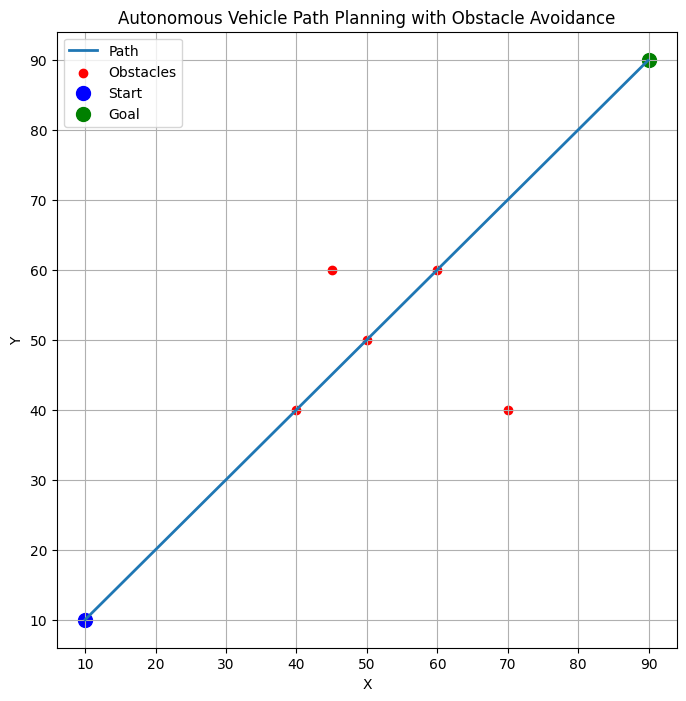

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Vehicle class
class Vehicle:
    def __init__(self, start, goal, obstacles):
        """ Initialize the vehicle, its path, and obstacles """
        self.position = np.array(start, dtype=float)
        self.goal = np.array(goal, dtype=float)
        self.path = [self.position.copy()]
        self.obstacles = obstacles
        self.speed = 1.0

    def move(self):
        """ Move the vehicle towards the goal while avoiding obstacles """
        direction = self.goal - self.position
        distance = np.linalg.norm(direction)

        # Check if the vehicle has reached its goal
        if distance < 1:
            return False

        # Normalize the direction vector
        direction = direction / distance

        # Obstacle avoidance logic
        for obs in self.obstacles:
            vec_to_obs = obs - self.position
            dist = np.linalg.norm(vec_to_obs)
            if dist < 5:  # Avoid if too close
                direction += (self.position - obs) / (dist + 1e-5)  # Small value added to prevent division by zero

        # Normalize the new direction vector
        direction = direction / np.linalg.norm(direction)

        # Move the vehicle
        self.position += direction * self.speed
        self.path.append(self.position.copy())
        return True

    def run(self):
        """ Keep moving until the goal is reached """
        while self.move():
            pass

# Define start, goal, and obstacles
start = (10, 10)
goal = (90, 90)
obstacles = np.array([
    [40, 40],
    [50, 50],
    [60, 60],
    [45, 60],
    [70, 40]
])

# Run simulation
vehicle = Vehicle(start, goal, obstacles)
vehicle.run()

# Plot the result
path = np.array(vehicle.path)
plt.figure(figsize=(8, 8))
plt.plot(path[:, 0], path[:, 1], label="Path", linewidth=2)
plt.scatter(*zip(*obstacles), c='red', label="Obstacles")
plt.scatter(*start, c='blue', label="Start", s=100)
plt.scatter(*goal, c='green', label="Goal", s=100)
plt.legend()
plt.grid(True)
plt.title("Autonomous Vehicle Path Planning with Obstacle Avoidance")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()